In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers

input_data = tf.ones((16, 3, 3))

seq_model = tf.keras.Sequential()

# input_shape jest niewymagane, lecz pozwala powiedzieć,
# "chcę mieć taki rozmiar danych wejściowych", co pozwala
# uniknąć głupich pomyłek w stylu: przekazujemy inny rozmiar,
# bo zapomnieliśmy np. zmniejszyć obrazów wejściowych

seq_model.add(layers.Flatten(input_shape=[3, 3]))
seq_model.add(layers.Dense(16, name="input_layer1"))
seq_model.add(layers.Dense(32, name="hidden_layer1"))
seq_model.add(layers.Dense(4, name="output_layer1"))


seq_model_2 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(16, name="input_layer2"),
    layers.Dense(32, name="hidden_layer2"),
    layers.Dense(4, name="output_layer2")
])

# uruchomienie naszego modelu z wygenerowanymi danymi
output = seq_model_2(input_data)
print(output)

tf.Tensor(
[[ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]
 [ 0.38944665  0.13789424 -0.06738089 -0.20179136]], shape=(16, 4), dtype=float32)


D:\ML_AI\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
D:\ML_AI\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
#images = images/255.0

# zapisujemy dane jako int
#labels = labels.astype(np.int32)
#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
#train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
#train_ds = train_ds.shuffle(1000).batch(32)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(320, activation='relu'),
    layers.Dense(150, activation='relu'),
    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

In [4]:
f_mnist_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 320)            │       251,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        48,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,860 (1.15 MB)

 Trainable params: 300,860 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [6]:
#train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [7]:
train_stats = f_mnist_model.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7710 - loss: 2.2669
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8269 - loss: 0.5030
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8415 - loss: 0.4504
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8491 - loss: 0.4283
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.3973
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3863
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3772
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8689 - loss: 0.3678
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8726 - loss: 0.3553
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3539
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.3432
Epoch 12/20
1875/1875 ━━━━━━━━

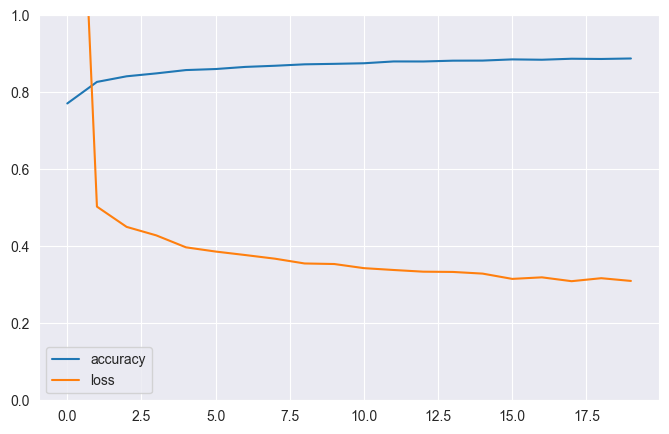

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
****************************************************************
probs :  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.2484137e-06 0.0000000e+00 8.3450403e-05 9.6826802e-29 9.9991035e-01]
klasa : 9
rzeczywista klasa:  9
Nazwa rzeczywistej klasy:  Ankle boot


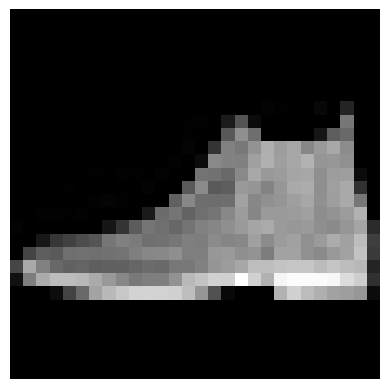

****************************************************************
probs :  [1.6429089e-04 6.5393741e-12 9.9085802e-01 6.2786262e-06 2.7956220e-03
 4.8989165e-30 6.1728116e-03 0.0000000e+00 3.0174979e-06 0.0000000e+00]
klasa : 2
rzeczywista klasa:  2
Nazwa rzeczywistej klasy:  Pullover


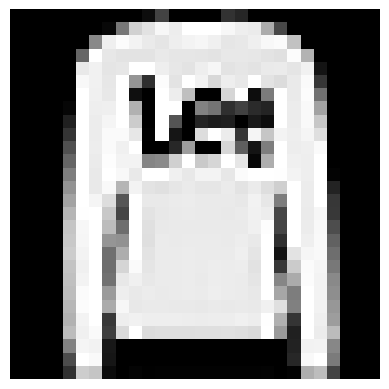

****************************************************************
probs :  [7.6744877e-10 1.0000000e+00 1.5264207e-12 3.9074082e-09 7.4998736e-09
 2.3725702e-26 3.5034600e-09 0.0000000e+00 4.0938856e-11 0.0000000e+00]
klasa : 1
rzeczywista klasa:  1
Nazwa rzeczywistej klasy:  Trouser


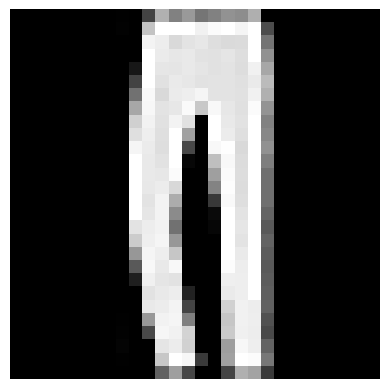

****************************************************************
probs :  [1.88700412e-07 9.99997616e-01 1.89592786e-09 7.00835130e-07
 8.27530073e-07 1.03841986e-19 6.76989714e-07 3.68131329e-31
 1.85683398e-08 7.29131874e-30]
klasa : 1
rzeczywista klasa:  1
Nazwa rzeczywistej klasy:  Trouser


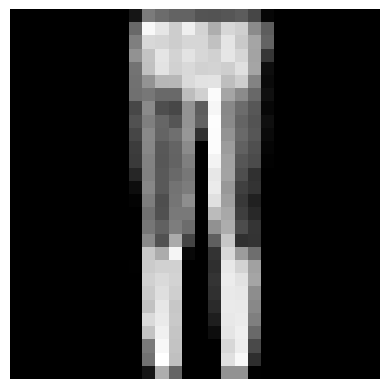

****************************************************************
probs :  [1.0544588e-02 1.4359276e-06 4.2371987e-03 4.5345626e-03 4.8428443e-03
 3.0660228e-20 9.7583270e-01 0.0000000e+00 6.7083565e-06 0.0000000e+00]
klasa : 6
rzeczywista klasa:  6
Nazwa rzeczywistej klasy:  Shirt


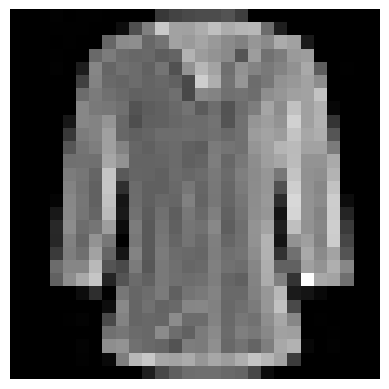

In [9]:
zalando_class = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def plot_img(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')   # ukrywa osie
    plt.show()

y_pred = f_mnist_model.predict(x_test)
for i in range(5):
    print('*' * 64)
    print("probs : ", y_pred[i])
    print("klasa :", np.argmax(y_pred[i]))
    print("rzeczywista klasa: ", y_test[i])
    print("Nazwa rzeczywistej klasy: ", zalando_class[y_test[i]])
    plot_img(x_test[i])

In [10]:
loss, accuracy = f_mnist_model.evaluate(x_test, y_test)
print(f"Dokładność modelu: {accuracy:.2f}, Loss: {loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8653 - loss: 0.4128
Dokładność modelu: 0.87, Loss: 0.41
